<h2>PCA with just scaling</h2>

4a

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pathlib import Path 
import os 
import string 
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = Path('/content/drive/My Drive/ml_hw6_q4/places.txt')

In [4]:
cd /content/drive/My Drive/ml_hw6_q4

/content/drive/My Drive/ml_hw6_q4


In [0]:
data = pd.read_csv('places.txt',delim_whitespace=True,na_values='?')
table = data[['Climate', 'HousingCost', 'HlthCare', 'Crime', 'Transp', 'Educ', 'Arts','Recreat', 'Econ']]

4b

In [6]:
table = np.log10(table)
table.head(5)

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
"Abilene,TX",2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
"Akron,OH",2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489
"Albany,GA",2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159
"Albany-Schenectady-Troy,NY",2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194
"Albuquerque,NM",2.818885,3.923917,3.267875,3.171141,3.816771,3.480869,3.652826,3.416973,3.757927


4c

In [7]:
mean = np.mean(table,axis = 0)
print(mean)

Climate        2.718494
HousingCost    3.907491
HlthCare       2.955487
Crime          2.951627
Transp         3.597202
Educ           3.446607
Arts           3.206209
Recreat        3.226567
Econ           3.734182
dtype: float64


In [8]:
table = table - mean
print(np.mean(table,axis = 0))

Climate        1.915388e-15
HousingCost    1.773657e-15
HlthCare       6.479113e-16
Crime          3.954959e-16
Transp         5.007814e-16
Educ           4.778346e-16
Arts           1.802003e-15
Recreat        2.663185e-15
Econ           8.706308e-16
dtype: float64


In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(table)
print(pca.components_.shape)

(9, 9)


4d and 4e

In [10]:
pa1 = pca.components_[0]
pa2 = pca.components_[1]
print(f"First principal axis = {pa1}")
print(f"Second principal axis = {pa2}")

First principal axis = [0.03507288 0.09335159 0.40776448 0.10044536 0.15009714 0.03215319
 0.87434057 0.15899622 0.01949418]
Second principal axis = [ 0.0088782   0.00923057 -0.85853187  0.22042372  0.05920111 -0.06058858
  0.30380632  0.33399255  0.0561011 ]


In [11]:
projected = pca.fit_transform(table)
print(f"First principal component = \n {projected[:, 0]}")
print(f"Second principal component = \n {projected[:, 1]}")

First principal component = 
 [-4.36677074e-01  6.20957601e-01 -8.73256319e-01  5.02948082e-01
  6.09775036e-01 -7.45633249e-01  5.09710932e-03 -3.93759635e-02
 -8.93575198e-01 -1.64904064e-01  7.03776040e-01  1.43875264e-01
 -6.68842631e-01 -9.77440004e-01  8.02625339e-01 -8.04526312e-01
 -1.54621973e-01 -1.62389595e-02  1.39749114e-01  8.70728224e-01
 -3.45375150e-01 -1.22784742e-01  3.88620116e-01  4.06486994e-01
 -2.23536863e-01  1.04615102e+00  7.55859984e-02  1.94483334e-01
 -5.73823216e-01 -3.97323657e-02 -1.73224976e-01 -2.71937936e-01
 -1.25118019e+00  8.87047017e-01 -3.47869328e-01 -4.80455237e-01
 -2.70025874e-03  4.54115136e-01 -1.76004109e-01  1.29823120e-02
 -3.92728280e-02  5.86171851e-02  1.40182619e+00  4.45607287e-01
 -1.07599057e+00 -2.01012631e-01 -7.83826267e-01  8.34867217e-01
 -4.76777676e-01  8.23426352e-02 -1.27166483e+00 -1.31549124e-02
  8.64680835e-01 -1.06223777e+00  2.20394326e-01 -3.48957580e-01
 -8.00244428e-01 -2.37092714e-01  1.19494634e-01  3.75861896

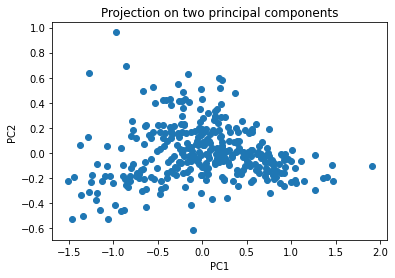

In [12]:
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on two principal components')
plt.show()

In [13]:
PC1_outliers = np.where(projected[:, 0]>1.5)
PC1_outliers = np.squeeze(PC1_outliers)
print(PC1_outliers)

PC2_outliers = np.where(projected[:, 1]>0.63)
PC2_outliers = np.squeeze(PC2_outliers)
print(PC2_outliers)

212
[ 50 119 194]


Outliers observed from the above plot

In [14]:
outliers = []
outliers.append(data.index[212])
outliers.append(data.index[50])
outliers.append(data.index[119])
outliers.append(data.index[194])
print(outliers)

['New-York,NY', 'Brownsville-Harlington,TX', 'Glens-Falls,NY', 'Midland,TX']


In [15]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[0.37746236 0.05105221 0.02791958 0.02296708 0.01677125 0.01195269
 0.0084567  0.00393422 0.00179733]


In [16]:
from numpy import diag
sq_evalues = np.sqrt(eigenvalues)
evalues_diag = diag(sq_evalues)
cc = np.dot(pca.components_.T, evalues_diag)
print(cc.T[0])
print(cc.T[1])

[0.02154807 0.05735332 0.2505222  0.06171159 0.09221663 0.01975427
 0.53717706 0.09768404 0.01197683]
[ 0.00200601  0.00208562 -0.19398302  0.04980416  0.01337634 -0.01368983
  0.06864424  0.07546474  0.0126759 ]


We are only interested in the top correlations with the first and second principal components, which means that we should look at the first column of cc and select variables with highest absolute values.

1. For the first component:
> From cc.T[0] we can see that PC1 appears to correlate the most with arts feature with a correlation value of 0.537

2. For the second component:
> From cc.T[1] we can see that PC2 appears to correlate the most with Healthcare feature with a correlation value of 0.1939




<h2>4f. PCA with standardizing</h2>

In [0]:
data = pd.read_csv('places.txt',delim_whitespace=True,na_values='?')
table = data[['Climate', 'HousingCost', 'HlthCare', 'Crime', 'Transp', 'Educ', 'Arts','Recreat', 'Econ']]

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(table)
mean = scaler.mean_
table = scaler.transform(table)

In [19]:
mean = np.mean(table,axis = 0)
print(mean)

[ 2.26768958e-16  3.88746786e-16 -3.23955655e-17  1.29582262e-16
 -2.91560089e-16  2.64563785e-16  1.07985218e-17 -1.61977827e-17
 -3.72549003e-16]


In [20]:
std = np.std(table,axis = 0)
print(std)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(table)
print(pca.components_.shape)

(9, 9)


In [22]:
pa1 = pca.components_[0]
pa2 = pca.components_[1]
print(f"First principal axis = {pa1}")
print(f"Second principal axis = {pa2}")

First principal axis = [0.20641395 0.35652161 0.46021465 0.28129838 0.35115078 0.27529264
 0.46305449 0.32788791 0.13541225]
Second principal axis = [ 0.21783531  0.250624   -0.29946528  0.35534227 -0.17960448 -0.48338209
 -0.19478992  0.38447464  0.47128328]


In [23]:
projected = pca.fit_transform(table)
print(f"First principal component = \n {projected[:, 0]}")
print(f"Second principal component = \n {projected[:, 1]}")

First principal component = 
 [-1.04176435e+00  4.40483533e-01 -1.87839614e+00  9.12128688e-01
  2.15252133e+00 -1.79068458e+00 -1.05705605e+00 -6.49308564e-01
 -1.80698850e+00 -5.00327920e-01  2.97757642e+00  4.48387275e-01
 -2.32871527e+00 -1.81823707e+00  1.87279151e+00 -2.00908458e+00
 -1.05555704e+00 -2.58499423e-01 -1.48905552e+00  3.02961694e+00
  1.37122389e+00 -1.02856279e+00 -4.96355523e-01  2.45528167e-03
 -4.56453278e-01  4.30390469e+00 -3.35788992e-01 -4.79727748e-01
 -1.12406189e+00 -9.83669345e-01 -1.83352844e+00 -7.64643770e-02
 -1.51418554e+00  2.82394680e+00 -3.55080324e-02 -1.37552095e+00
 -4.20250116e-01  2.67813903e-01 -1.57998708e+00 -1.28456459e+00
 -2.23237082e-01 -3.78309402e-01  6.31065516e+00  2.03324315e+00
 -9.21314225e-01 -1.44916582e+00 -1.13458718e+00  2.25647837e+00
 -8.74523291e-01 -1.48039999e-01 -1.61551967e+00 -7.39241315e-01
  1.87933107e+00 -2.00429375e+00  1.62177989e+00 -1.29296999e+00
 -9.93463453e-01 -9.60813355e-01  7.41296452e-01  9.86604182

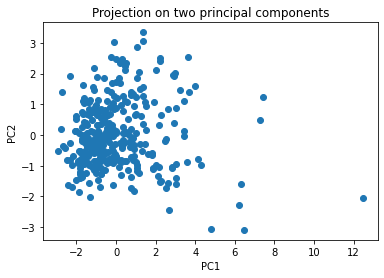

In [24]:
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on two principal components')
plt.show()

Outliers observed from the above plot

In [25]:
PC1_outliers = np.where(projected[:, 0]>12)
PC1_outliers = np.squeeze(PC1_outliers)
print(PC1_outliers)

PC2_outliers = np.where(projected[:, 1]<-3)
PC2_outliers = np.squeeze(PC2_outliers)
print(PC2_outliers)

212
[ 64 233]


In [26]:
outliers = []
outliers.append(data.index[212])
outliers.append(data.index[64])
outliers.append(data.index[233])
print(outliers)

['New-York,NY', 'Chicago,IL', 'Philadelphia,PA-NJ']


In [27]:
eigenvalues = pca.explained_variance_
print(eigenvalues)

[3.41868293 1.21767731 1.14495927 0.9237255  0.75558148 0.63248434
 0.49455091 0.31900812 0.12076916]


In [28]:
from numpy import diag
sq_evalues = np.sqrt(eigenvalues)
evalues_diag = diag(sq_evalues)
cc = np.dot(pca.components_.T, evalues_diag)
print(cc.T[0])
print(cc.T[1])

[0.38165281 0.65919707 0.85092219 0.52011172 0.64926658 0.50900729
 0.85617297 0.60625427 0.25037293]
[ 0.24037781  0.27655962 -0.3304552   0.39211457 -0.1981907  -0.53340449
 -0.21494759  0.42426168  0.52005364]


We are only interested in the top correlations with the first and second principal components, which means that we should look at the first column of cc and select variables with highest absolute values.

1. For the first component:
> From cc.T[0] we can see that PC1 appears to correlate the most with arts feature with a correlation value of 0.856

2. For the second component:
> From cc.T[1] we can see that PC2 appears to correlate the most with Education feature with a correlation value of 0.533


The consistent outlier found in cases of scaling(mean = 0) and standardizing(mean=0, var = 1) is sample number 212 which is New York, NY

> Principal component analysis will tend to give more emphasis to those variables that have higher variances than to those variables that have lower variances. In effect the results of the analysis will depend on the units of measurement used to measure each variable. That would imply that a principal component analysis should only be used with the raw data if all variables have the same units of measure. And even in this case, only if you wish to give those variables which have higher variances more weight in the analysis. 

> From the above reasoning we can conclude that it is necessary to standardize the variables before performing PCA. From the above solution we can see that the outliers are different in both the cases, except for the outlier 212(New York).

> From the above plots we see that the results for standardizing and not standardizing vary. PC1 and PC2 value are different which changes the plot this inturn changes the outliers.  